# Exercise 13 : Zipf's Law

Elucidate Zipf's Law for all articles present in sklearn’s “The 20 newsgroups text dataset”

In [1]:
from pylab import *
import nltk
nltk.download('stopwords')
from sklearn.datasets import fetch_20newsgroups
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from collections import Counter
newsgroups_data_sample = fetch_20newsgroups(subset='train')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sohom.ghosh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
stop_words = stopwords.words('english')

#adding individual printable characters to list of wtop words so that they get renoved along with the stopwords
stop_words = stop_words + list(string.printable)

In [3]:
tokenized_corpus = [word.lower() for sentence in newsgroups_data_sample['data'] \
                    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', sentence)) \
                    if word.lower() not in stop_words]


In [4]:
token_count_di = Counter(tokenized_corpus)

In [5]:
token_count_di.most_common(50)

[('ax', 62412),
 ('edu', 21321),
 ('subject', 12265),
 ('com', 12134),
 ('lines', 11835),
 ('organization', 11233),
 ('one', 9017),
 ('would', 8910),
 ('writes', 7844),
 ('article', 7438),
 ('people', 5977),
 ('like', 5868),
 ('university', 5589),
 ('posting', 5507),
 ('know', 5134),
 ('get', 4998),
 ('host', 4996),
 ('nntp', 4814),
 ('max', 4776),
 ('think', 4583),
 ('also', 4308),
 ('use', 4187),
 ('time', 4102),
 ('new', 3986),
 ('good', 3759),
 ('ca', 3546),
 ('could', 3511),
 ('well', 3480),
 ('us', 3364),
 ('may', 3313),
 ('even', 3280),
 ('see', 3065),
 ('cs', 3041),
 ('two', 3015),
 ('way', 3002),
 ('god', 2998),
 ('first', 2976),
 ('many', 2945),
 ('make', 2894),
 ('much', 2879),
 ('system', 2817),
 ('distribution', 2767),
 ('right', 2742),
 ('world', 2724),
 ('say', 2706),
 ('want', 2522),
 ('go', 2474),
 ('anyone', 2468),
 ('10', 2466),
 ('reply', 2463)]

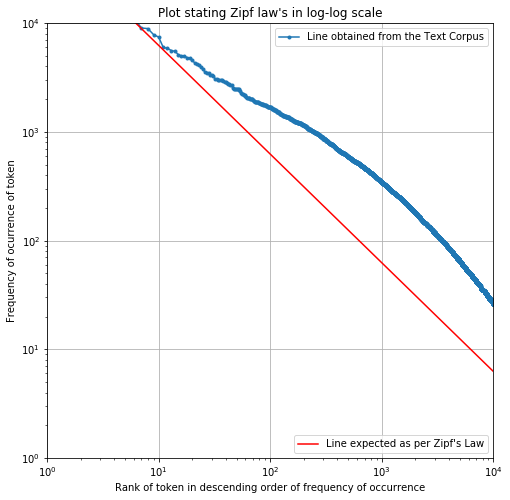

In [6]:
frequencies = [b for (a,b) in token_count_di.most_common(10000)]
tokens = [a for (a,b) in token_count_di.most_common(10000)]
ranks = range(1, len(frequencies)+1)


plt.figure(figsize=(8,8))
plt.ylim(1,10**4)
plt.xlim(1,10**4)

#Actual ranks and frequencies
obtained_line, = loglog(ranks, frequencies, marker=".", label="Line obtained from the Text Corpus")
obtained_legend = plt.legend(handles=[obtained_line], loc=1)
ax = plt.gca().add_artist(obtained_legend)

#Expected ranks and frequnecies as per Zipf's law
expected_line, = plt.plot([1,frequencies[0]],[frequencies[0],1],color='r',label="Line expected as per Zipf's Law")
plt.legend(handles=[expected_line], loc=4)

title("Plot stating Zipf law's in log-log scale")
xlabel("Rank of token in descending order of frequency of occurrence")
ylabel("Frequency of ocurrence of token")
grid(True)